In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("Trainable_data.csv")
df = df.drop(['Unnamed: 0','zip'],axis=1)
df.head()

,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,...,male_male_households,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces,Liking
0,0,1,0.215686,0,0.0,0.522472,0.537313,0.482890,0.191542,0.526832,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
1,0,1,0.235294,0,0.0,0.533708,0.574627,0.528517,0.144279,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
2,0,1,0.254902,0,0.0,0.460674,0.462687,0.498099,0.184080,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
3,0,1,0.274510,0,0.0,0.370787,0.440299,0.429658,0.191542,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0
4,0,1,0.294118,0,0.0,0.297753,0.462687,0.463878,0.184080,0.526171,...,0.0,1.0,0.013666,1.0,1.0,0.202186,0.0,1.0,0.0,0.0


In [3]:
df.columns

Index(['submarket_name', 'building_class', 'year', 'period', 'completions',
       'vac_pct', 'vacancy_chg_bps', 'asking_rent_pct_chg',
       'abs_per_occ_stk_pct', 'construction_per_absorption',
       'total_employment_pct_chg', 'households_pct_chg',
       'household_avg_income_pct_chg', 'total_pop', 'median_age',
       'male_18_to_19', 'male_80_to_84', 'white_pop', 'amerindian_pop',
       'other_race_pop', 'two_or_more_races_pop', 'median_income',
       'income_less_10000', 'gini_index',
       'owner_occupied_housing_units_lower_value_quartile',
       'vacant_housing_units', 'vacant_housing_units_for_sale',
       'dwellings_1_units_attached', 'dwellings_20_to_49_units',
       'dwellings_50_or_more_units', 'mobile_homes',
       'housing_built_1939_or_earlier', 'median_year_structure_built',
       'male_male_households', 'percent_income_spent_on_rent',
       'million_dollar_housing_units', 'different_house_year_ago_same_city',
       'two_parents_mother_in_labor_force_fami

In [4]:
X = df.drop('Liking',axis = 1)
y = df['Liking']

In [5]:
df['Liking'].value_counts()

1.0    2665
0.0     615
Name: Liking, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [7]:
model = KNN(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

<AxesSubplot:>

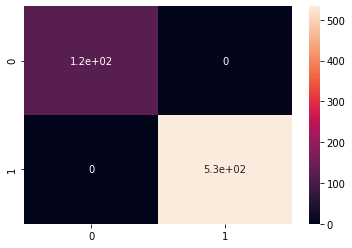

In [8]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [9]:
X_test.shape,X.shape

((656, 42), (3280, 42))

<AxesSubplot:>

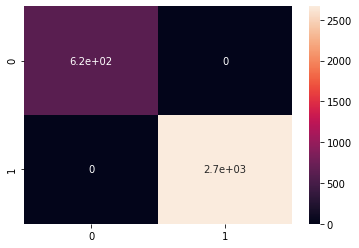

In [10]:
y_pred = model.predict(X)
sns.heatmap(confusion_matrix(y,y_pred),annot=True)